<a href="https://colab.research.google.com/github/Ravi-Teja-Reddy/Ravi-Teja-Reddy.github.io/blob/master/rollnumber_Assignment3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q1.ipynb`.

## Question 1

This question is based on seminal work by Zhang et al. The paper is titled 'Understanding deep learning requires rethinking generalization'. The paper talks about how the traditional methods fail to explain generalization of neural network. They show that a sufficiently parameterized network can easily fit a random labeling of the training data. This fitting cannot be curbed by explicit regularization.


## Q) 1.1 
Lets take a hello world dataset for ML algorithm the MNIST!
This question requires you to train a convolutional neural network.
Architecture: 4 layers of convolution with 64 filters in each layer. Keep activation map size same using padding.

In [ ]:
from tensorflow import keras   # feel free to use MNIST data from other sources 
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
from keras.models import Model
import random


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# normalize the pixel values to the range 0 and 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### One-hot-encode your labels here

In [ ]:
print ('label shape: ',np.shape(y_train),np.shape(y_test))
def encode(y):
    y = np_utils.to_categorical(y)
    return y

y_train = encode(y_train)
y_test = encode(y_test)
print ('label shape: ',np.shape(y_train),np.shape(y_test))

label shape:  (60000,) (10000,)
label shape:  (60000, 10) (10000, 10)


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
inpx = (28, 28, 1)

In [ ]:
# inpx = Input(shape=inpx)
# layer1 = Conv2D(64, kernel_size=(3, 3), activation='relu')(inpx)
# layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
# layer3 = Conv2D(64, (3, 3), activation='relu')(layer2)
# layer4 = Conv2D(64, (3, 3), activation='relu')(layer3)

# #layer5 = MaxPooling2D(pool_size=(3, 3))(layer2)
# layer6 = Dropout(0.5)(layer3)
# layer7 = Flatten()(layer4)
# layer8 = Dense(250, activation='sigmoid')(layer4)
# layer9 = Dense(10, activation='softmax')(layer6)

In [ ]:
# model = Model([inpx], layer7)
# model.compile(optimizer=keras.optimizers.Adadelta(),
#               loss=keras.losses.categorical_crossentropy,
#               metrics=['accuracy'])
 
# model.fit(x_train, y_train, epochs=12, batch_size=500)

In [ ]:
# score = model.evaluate(x_test, y_test, verbose=0)
# print('loss=', score[0])
# print('accuracy=', score[1])

#### Define the model mentioned above
    1) Print the number of trainable parameters
     Use sgd optimizer with softmax at last layer 
     Train the model until convergence (use test data only for model selection and early stopping!)
    2) Report the train and test accuracy
    3) Plot the train and test accuracy and loss throughout the training

In [ ]:
#code here

def create_model():
  input_ = keras.layers.Input(shape=inpx)
  layer1 = Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same')(input_)
  layer2 = Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same')(layer1)
  layer3 = Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same')(layer2)
  layer4 = Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same')(layer3)
  flatten = keras.layers.Flatten()(layer4)#784
  hidden_layer1 = keras.layers.Dense(900, activation="relu")(flatten)
  hidden_layer2 = keras.layers.Dense(400, activation='relu')(hidden_layer1)
  output = keras.layers.Dense(10, activation='softmax')(hidden_layer2)
  model = keras.Model(inputs=[input_], outputs=[output] )
  return model

In [ ]:

model = create_model()
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
 

In [ ]:
model.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 900)               451593

In [ ]:
erly_stping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    verbose=1,
    patience=2,   
    mode="auto",
    restore_best_weights=True,
)

In [ ]:
out = model.fit(x_train, y_train, epochs=12, callbacks=[erly_stping], validation_data=(x_test,y_test) )

Epoch 1/12
1875/1875 [==============================] - 77s 36ms/step - loss: 0.3123 - accuracy: 0.9097 - val_loss: 0.1045 - val_accuracy: 0.9663
Epoch 2/12
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0941 - accuracy: 0.9714 - val_loss: 0.0706 - val_accuracy: 0.9775
Epoch 3/12
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0612 - accuracy: 0.9812 - val_loss: 0.0609 - val_accuracy: 0.9794
Epoch 4/12
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.0640 - val_accuracy: 0.9795
Epoch 5/12
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0559 - val_accuracy: 0.9831
Epoch 6/12
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0201 - accuracy: 0.9940 - val_loss: 0.0514 - val_accuracy: 0.9833
Epoch 7/12
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0563 -

313/313 - 3s - loss: 0.0563 - accuracy: 0.9851 - 3s/epoch - 10ms/step


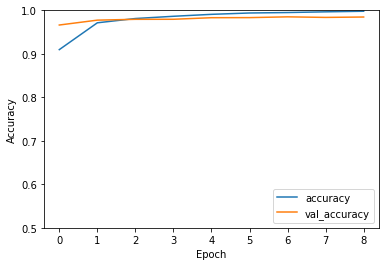

In [ ]:
plt.plot(out.history['accuracy'], label='accuracy')
plt.plot(out.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

## Q) 1.2
Now lets start adding label noise to the dataset


1) Randomize 20% of train labels and repeat Q1 (1,2 & 3)

2) Randomize 40% of train labels and repeat Q1 (3)

3) Randomize 60% of train labels and repeat Q1 (3)

4) Randomize 80% of train labels and repeat Q1 (3)

5) Randomize 100% of train labels and repeat Q1 (3)


In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_train.shape

n=int(0.2*(y_train.shape)[0])


In [ ]:
n

12000

In [ ]:
index = np.random.choice((y_train).shape[0], n, replace=False) 

In [ ]:
index


array([17765, 36692, 58871, ..., 54744, 36305, 12924])

In [ ]:
def randomize_label(percent):
  percent=percent/100
  n=int(percent*(y_train.shape)[0])
  index = np.random.choice((y_train).shape[0], n, replace=False)

  for i in index:
    outclass=random.randint(0,9)

    if(y_train[i][outclass]!=0):
      for j in range(0,10):
        if(j==outclass):
          y_train[i][j]=1
        else:
          y_train[i][j]=0

In [ ]:
def load_data():
  (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
  # normalize the pixel values to the range 0 and 1
  x_train = x_train.astype("float32") / 255
  x_test = x_test.astype("float32") / 255

  x_train = np.expand_dims(x_train, -1)
  x_test = np.expand_dims(x_test, -1)
  y_train = encode(y_train)
  y_test = encode(y_test)



In [ ]:
load_data()
randomize_label(20)
model = create_model()
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
model.summary()
 


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 900)               451593

In [ ]:
out = model.fit(x_train, y_train, epochs=12, callbacks=[erly_stping], validation_data=(x_test,y_test) )

Epoch 1/12
1875/1875 [==============================] - 76s 35ms/step - loss: 0.3218 - accuracy: 0.9052 - val_loss: 0.1192 - val_accuracy: 0.9599
Epoch 2/12
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0955 - accuracy: 0.9702 - val_loss: 0.1010 - val_accuracy: 0.9694
Epoch 3/12
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0628 - accuracy: 0.9806 - val_loss: 0.0718 - val_accuracy: 0.9779
Epoch 4/12
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0435 - accuracy: 0.9868 - val_loss: 0.0529 - val_accuracy: 0.9823
Epoch 5/12
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0560 - val_accuracy: 0.9815
Epoch 6/12
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.0511 - val_accuracy: 0.9836
Epoch 7/12
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.0504 -

313/313 - 3s - loss: 0.0577 - accuracy: 0.9855 - 3s/epoch - 11ms/step


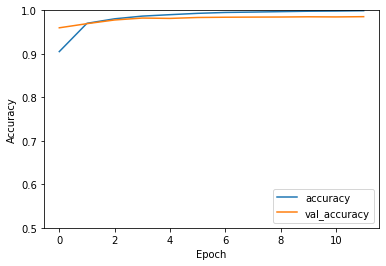

In [ ]:
plt.plot(out.history['accuracy'], label='accuracy')
plt.plot(out.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)